In [1]:
import os
os.getcwd() 

'/home/swamikedari/Arificial Intelligence'

In [2]:
import os
import cv2 


In [3]:
images=[]
labels=[]

In [4]:
for i in range(43):
    imageCollection=os.listdir("/home/swamikedari/Arificial Intelligence/archive/myData/"+str(i))
    for filename in imageCollection:
        j=cv2.imread("/home/swamikedari/Arificial Intelligence/archive/myData/"+str(i)+"/"+str(filename))
        images.append(j)
        labels.append(i)
        

In [5]:
import numpy as np

In [6]:
images=np.array(images)
labels=np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
trainFeatures,testFeatures,trainTargets,testTargets=train_test_split(images,labels,test_size=0.2)


In [9]:
def preProcessing(x):
    x=cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
    x=x/255
    return x

In [10]:
def square(i):
    j=i*i
    return j

In [11]:
list(map(square,range(5)))

[0, 1, 4, 9, 16]

In [12]:
trainFeatures=np.array(list(map(preProcessing,trainFeatures)))

In [13]:
testFeatures = np.array(list(map(preProcessing,testFeatures)), dtype = np.uint8)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

2022-07-16 12:53:38.791692: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-16 12:53:38.818687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/swamikedari/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-16 12:53:38.818700: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
Generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.3,rotation_range=0.2)

In [16]:
trainTargets.shape

(58511,)

In [17]:
testFeatures.shape

(14628, 32, 32)

In [18]:
trainFeatures.shape

(58511, 32, 32)

In [20]:
trainFeatures=trainFeatures.reshape(58511,32,32,1)

In [21]:
testFeatures=testFeatures.reshape(14628,32,32,1)

In [22]:
Generator.fit(trainFeatures)

In [23]:
batches=Generator.flow(trainFeatures,trainTargets,batch_size=20)

In [24]:
import matplotlib.pyplot as pt

In [25]:
x,y=next(batches)

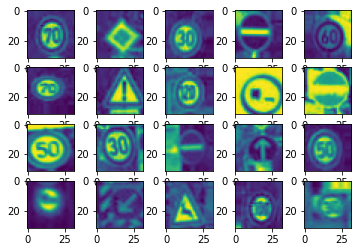

In [26]:
for i in range(20):
    pt.subplot(4,5,i+1)
    pt.imshow(x[i].reshape(32,32))
pt.show()

In [27]:
x[0].shape

(32, 32, 1)

In [28]:
import keras
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,MaxPooling2D ,Flatten
from keras.models import Sequential

In [29]:
trainTargets=to_categorical(trainTargets)

In [30]:
trainTargets[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
model=Sequential()
model.add(Conv2D(60,(5,5),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(43,activation="softmax"))

2022-07-16 12:55:27.766496: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-16 12:55:27.766544: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-07-16 12:55:27.767613: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
from keras.optimizers import Adam

In [33]:
model.compile(Adam(lr=0.002),loss="categorical_crossentropy",metrics=["accuracy"])


/home/swamikedari/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
model.fit_generator(Generator.flow(trainFeatures,trainTargets,20),epochs=5)

Epoch 1/5


/tmp/ipykernel_30515/3384841677.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(Generator.flow(trainFeatures,trainTargets,20),epochs=5)


2926/2926 [==============================] - 92s 31ms/step - loss: 1.0776 - accuracy: 0.6867
Epoch 2/5
2926/2926 [==============================] - 96s 33ms/step - loss: 0.2672 - accuracy: 0.9215
Epoch 3/5
2926/2926 [==============================] - 96s 33ms/step - loss: 0.2037 - accuracy: 0.9434
Epoch 4/5
2926/2926 [==============================] - 97s 33ms/step - loss: 0.1823 - accuracy: 0.9501
Epoch 5/5
2926/2926 [==============================] - 97s 33ms/step - loss: 0.1714 - accuracy: 0.9549


In [35]:
x[0].shape


(32, 32, 1)

In [36]:
model.predict(x[0].reshape(1,32,32,1))

1/1 [==============================] - 0s 81ms/step


array([[2.3832780e-15, 9.7909929e-09, 6.6153107e-12, 2.0108954e-33,
        1.0000000e+00, 1.0762774e-17, 0.0000000e+00, 8.1874570e-16,
        1.1956814e-12, 1.8352688e-34, 2.4754744e-32, 1.7428077e-35,
        6.6882142e-26, 3.9462975e-34, 2.5135886e-29, 1.0493631e-15,
        0.0000000e+00, 9.2719723e-25, 6.2656476e-32, 3.3459422e-30,
        5.5513892e-34, 7.3675677e-26, 6.9783487e-33, 9.5048753e-29,
        1.5784021e-23, 1.9889606e-27, 5.1282626e-20, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.8717128e-30,
        1.0621569e-32, 2.8759227e-30, 1.8810408e-21, 2.1329316e-27,
        2.9997091e-36, 2.2011565e-29, 6.1599738e-24, 2.3571683e-28,
        1.7358671e-28, 2.0208642e-38, 8.0471010e-30]], dtype=float32)

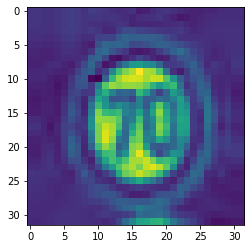

In [38]:
pt.imshow(x[0].reshape(32,32))

In [39]:
def getClass(i):
    if(i==0):
        return "2o km/hr speed limit"
    elif(i==1):
        return "30 km/hr speed limit"
    elif(i==2):
        return "50 km/hr speed limit"Q
    elif(i==3):
        return "60 km/hr speed limit"
    elif(i==4):
        return "70 km/hr speed limit"
    elif(i==5):
        return "80 km/hr speed limit"
    elif(i==6):
        return "End of Speed Limit 80 km/hr"
    elif(i==7):
        return "Speed Limit 100 km/hr"
    elif(i==8):
        return "Speed Limit 120 km/hr"
    elif(i==9):
        return "No passing"
    elif(i==10):
        return "No passing for vehicles over 3.5 metric tonnes"
    elif(i==11):
        return "Right of way at the next intersection"
    elif(i==12):
        return "Priority road"
    elif(i==13):
        return "Yield"
    elif(i==14):
        return "Stop"
    elif(i==15):
        return "No vehicles"
    elif(i==16):
        return "Vehicles over 3.5 metric tons prohibited"
    elif(i==17):
        return "No entry"
    elif(i==18):
        return "General Caution"
    elif(i==19):
        return "Dangerous curve to the left"
    elif(i==20):
        return "Dangerous curve to the right"
    elif(i==21):
        return "Double curve"
    elif(i==22):
        return "Bumpy road"
    elif(i==23):
        return "Small Road Ahead"
    elif(i==24):
        return "Flyover ahead"
    elif(i==25):
        return "Construction work ahead"
    elif(i==26):
        return "Signal Ahead"
    elif(i==27):
        return "Pedestrian Road"
    elif(i==28):
        return "Children crossing"
    elif(i==29):
        return "Bicycles crossing"
    elif(i==30):
        return "Beware of ice/snow"
    elif(i==31):
        return "Wild animals crossing"
    elif(i==32):
        return "End of all speed and passing limits"
    elif(i==33):
        return "Turn right ahead"
    elif(i==34):
        return "Turn left ahead"
    elif(i==35):
        return "Ahead only"
    elif(i==36):
        return "Go straight or right"
    elif(i==37):
        return "Go straight or left"
    elif(i==38):
        return "Keep right"
    elif(i==39):
        return "Keep left"
    elif(i==40):
        return "Roundabout mandatory"
    elif(i==41):
        return "End of no passing"
    return "End of no passing by vechiles over 3.5 metric tons"
    

In [107]:
def getMax(arr):
    maxa=arr[0]
    maxInd=0
    for i in range(1,len(arr)):
        if arr[i]>maxa:
            maxa=arr[i]
            maxInd=i
    return maxInd

In [108]:
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,800)
cap.set(10,200)


True

In [109]:
while True:
    success,imOrig=cap.read()
    im=np.asarray(imOrig)
    im=cv2.resize(im,(32,32))
    im=preProcessing(im)
    #cv2.imshow("Processed Image",im)
    im=im.reshape(1,32,32,1)
    #predictedIndex=model.predict_classes(im)
    predictArray=model.predict(im)
    prediction=np.amax(predictArray)
    predictedIndex=np.argmax(predictArray,axis=1)
    cv2.putText(imOrig,"The Results are :",(23,34),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
    if(prediction>0.99999):
        cv2.putText(imOrig,"Class: "+getClass(predictedIndex),(23,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imOrig,"Probability:"+str(prediction),(23,170),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("processed",imOrig)
    if cv2.waitKey(1)==ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break
    
    
    
    

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step
